In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import string
import spacy
from matplotlib.pyplot import imread

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [5]:
data=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/updated-Folders/Text-Mining/Elon_musk.csv",encoding="ISO-8859-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
data.drop(columns='Unnamed: 0',inplace=True)

In [7]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
len(data)

1999

In [9]:
data.isnull().sum()

Text    0
dtype: int64

In [11]:
data=data.drop_duplicates()

In [12]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
len(data)

1997

In [14]:
data = [Text.strip() for Text in data.Text] 
data = [Text for Text in data if Text]
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [16]:
!python -m spacy download en_core_web_md

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-09 16:50:53.307705: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [17]:
nlp = spacy.load('en_core_web_md')

In [18]:
one_block = data[3]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [19]:
one_block

'@gtera27 Doge is underestimated'

In [20]:
doc_block

@gtera27 Doge is underestimated

In [21]:
for token in doc_block:
    print(token, token.pos_)

@gtera27 PROPN
Doge PROPN
is AUX
underestimated VERB


In [22]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['underestimated']


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

In [24]:
wf_df

,word,count
0,underestimated,1


In [25]:
print(X)

  (0, 0)	1


In [26]:
print(sum_words)

[[1]]


In [27]:
print(words_freq)

[('underestimated', 1)]


In [28]:
one_block1 = data[78]
one_block1
doc_block1 = nlp(one_block1)
spacy.displacy.render(doc_block1, style='ent', jupyter=True)

In [29]:
one_block1

'RT @SpaceX: Falcon 9 launches 60 Starlink satellites to orbit \x96 mission from pad 39A on deck https://t.co/71cuCBgPNX'

In [30]:
doc_block1

RT @SpaceX: Falcon 9 launches 60 Starlink satellites to orbit  mission from pad 39A on deck https://t.co/71cuCBgPNX

In [31]:
for token in doc_block1:
    print(token, token.pos_)

RT PROPN
@SpaceX ADJ
: PUNCT
Falcon PROPN
9 NUM
launches VERB
60 NUM
Starlink PROPN
satellites NOUN
to ADP
orbit NOUN
 ADP
mission NOUN
from ADP
pad NOUN
39A NUM
on ADP
deck NOUN
https://t.co/71cuCBgPNX SPACE


In [32]:
nouns_verbs1 = [token.text for token in doc_block1 if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs1)

['launches', 'satellites', 'orbit', 'mission', 'pad', 'deck']


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X1 = cv.fit_transform(nouns_verbs1)
sum_words = X1.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

In [34]:
wf_df

,word,count
0,launches,1
1,satellites,1
2,orbit,1
3,mission,1
4,pad,1
5,deck,1


In [35]:
print(sum_words)

[[1 1 1 1 1 1]]


In [36]:
print(X)

  (0, 0)	1


In [37]:
print(words_freq)

[('launches', 1), ('satellites', 1), ('orbit', 1), ('mission', 1), ('pad', 1), ('deck', 1)]


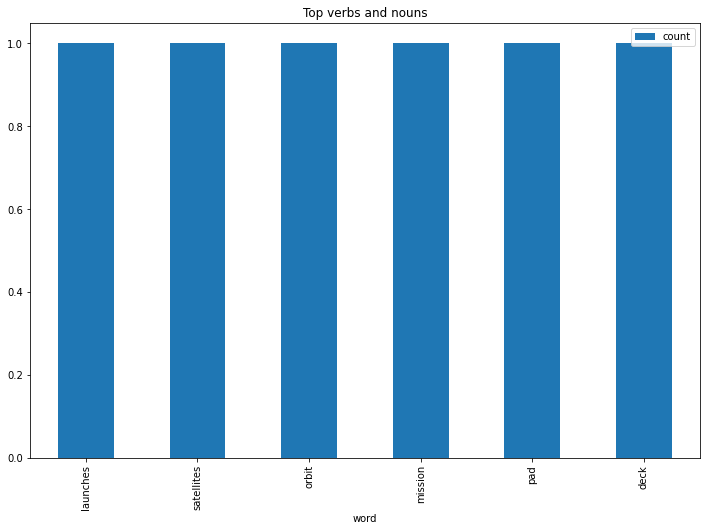

In [38]:
wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [39]:
import string
import spacy

In [40]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt

In [41]:
affin=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/Latest-Data-Science-Assignments-Material/Day-34-Text-Mining-contd/Data-Sets/Afinn.csv",encoding="ISO-8859-1")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [42]:
import nltk

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [46]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:10]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [47]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [49]:
affinity_scores = affin.set_index('word')['value'].to_dict()

In [50]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [51]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [52]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [53]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [54]:
sent_df[sent_df.sentiment_value<-4]


,sentence,sentiment_value
64,"Also, the road to hell is mostly paved with ba...",-7
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8
837,Cool Model 3 review by @iamjamiefoxx https://t...,-7


In [55]:
sent_df[sent_df.sentiment_value>10]

,sentence,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",13
81,@teslaownersSV This is a good one @MrBeastYT I...,13
105,@Erdayastronaut @SpaceX Was also thinking that...,16
123,It isnt enough to be safer than human drivers...,12
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12
224,"@PPathole @karpathy For a second there, I thou...",11
258,@TheOnion @ID_AA_Carmack Yup @flcnhvy Change o...,11
585,The open areas https://t.co/rabjKrtQlw @Sav...,14
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13
719,We just havent observed the https://t.co/mez...,17


In [56]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [57]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
224,"@PPathole @karpathy For a second there, I thou...",11,69
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
123,It isnt enough to be safer than human drivers...,12,51
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",13,231
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
719,We just havent observed the https://t.co/mez...,17,72


In [58]:
sent_df['sentiment_value'].describe()

count    924.000000
mean       1.371212
std        2.718596
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [59]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

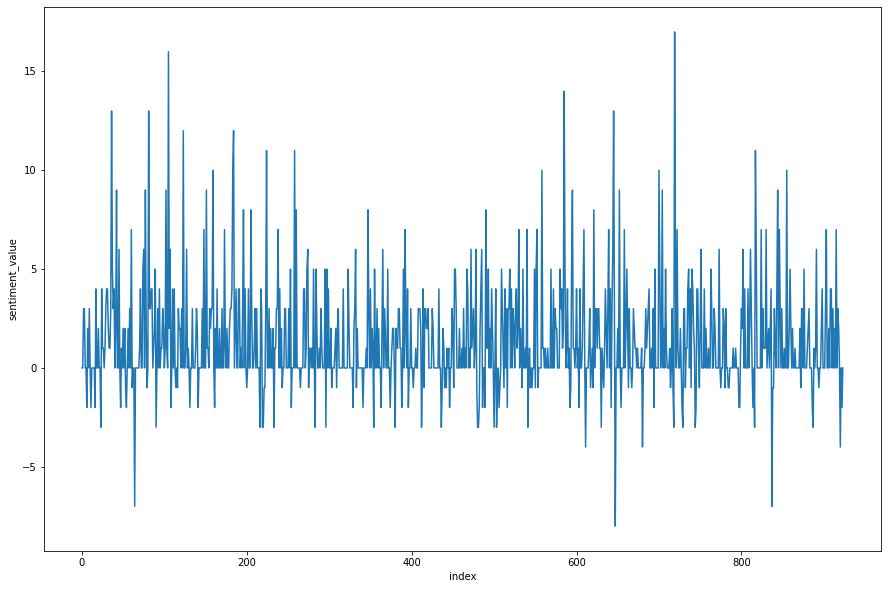

In [61]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

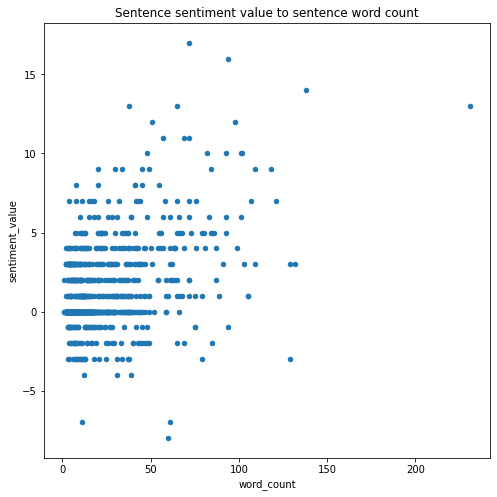

In [62]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [ ]:
AMAZON REVIEW DATASET

In [65]:
!pip install spacy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
import numpy as np 
import pandas as pd 
import string
import spacy 


In [111]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df=pd.read_csv("https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?select=1429_1.csv",error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 9: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 4\nSkipping line 12: expected 1 fields, saw 3\nSkipping line 13: expected 1 fields, saw 4\nSkipping line 28: expected 1 fields, saw 8\nSkipping line 32: expected 1 fields, saw 8\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 50: expected 1 fields, saw 9\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 6\nSkipping line 60: expected 1 fields, saw 2\nSkipping line 61: expected 1 fields, saw 3\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 2\nSkipping line 74: expected 1 fields, saw 4\nSkipping line 

In [115]:
df

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,<title>Consumer Reviews of Amazon Products |...
3,"<meta charset=""utf-8"" />"
4,"<meta name=""turbolinks-cache-control"" conten..."
...,...
92,</script>
93,</div>
94,</main>
95,</body>


In [116]:
book = [x.strip() for x in df.x] # remove both the leading and the trailing characters
book = [x for x in df if x] # removes empty strings, because they are considered in Python as False
book[0:10]

AttributeError: ignored

In [117]:
data=pd.read_csv("https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?select=Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv",error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 9: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 4\nSkipping line 12: expected 1 fields, saw 3\nSkipping line 13: expected 1 fields, saw 4\nSkipping line 28: expected 1 fields, saw 8\nSkipping line 32: expected 1 fields, saw 8\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 50: expected 1 fields, saw 9\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 6\nSkipping line 60: expected 1 fields, saw 2\nSkipping line 61: expected 1 fields, saw 3\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 2\nSkipping line 74: expected 1 fields, saw 4\nSkipping line 

In [118]:
data

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,<title>Consumer Reviews of Amazon Products |...
3,"<meta charset=""utf-8"" />"
4,"<meta name=""turbolinks-cache-control"" conten..."
...,...
92,</script>
93,</div>
94,</main>
95,</body>


In [119]:
data=pd.read_csv("https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews?select=ratings_Electronics+%281%29.csv",error_bad_lines=False)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 9: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 4\nSkipping line 28: expected 1 fields, saw 8\nSkipping line 32: expected 1 fields, saw 8\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 50: expected 1 fields, saw 9\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 6\nSkipping line 60: expected 1 fields, saw 2\nSkipping line 61: expected 1 fields, saw 3\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 2\nSkipping line 87: expected 1 fields, saw 50\nSkipping line 106: expected 1 fields, saw 2\nSkipping lin

In [120]:
data

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,<title>Amazon Product Reviews | Kaggle</title>
3,"<meta charset=""utf-8"" />"
4,"<meta name=""description"" content=""Electronic..."
...,...
93,</script>
94,</div>
95,</main>
96,</body>


In [122]:
abc=pd.read_csv("https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews?select=ratings_Electronics+%281%29.csv",error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 9: expected 1 fields, saw 2\nSkipping line 12: expected 1 fields, saw 2\nSkipping line 13: expected 1 fields, saw 4\nSkipping line 28: expected 1 fields, saw 8\nSkipping line 32: expected 1 fields, saw 8\nSkipping line 35: expected 1 fields, saw 2\nSkipping line 37: expected 1 fields, saw 2\nSkipping line 50: expected 1 fields, saw 9\nSkipping line 54: expected 1 fields, saw 2\nSkipping line 55: expected 1 fields, saw 6\nSkipping line 60: expected 1 fields, saw 2\nSkipping line 61: expected 1 fields, saw 3\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 63: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 2\nSkipping line 87: expected 1 fields, saw 50\nSkipping line 106: expected 1 fields, saw 2\nSkipping lin

In [123]:
abc

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,<title>Amazon Product Reviews | Kaggle</title>
3,"<meta charset=""utf-8"" />"
4,"<meta name=""description"" content=""Electronic..."
...,...
93,</script>
94,</div>
95,</main>
96,</body>


In [124]:
from google.colab import files
uploaded = files.upload()

xyz = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
xyz.head()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews.csv


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [196]:
data=xyz

In [197]:
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [198]:
len(data)

23486

In [155]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [156]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [199]:
data=data.drop(columns=['Unnamed: 0','Age','Title','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name'],axis=1)

In [200]:
data

,Clothing ID,Review Text,Rating
0,767,Absolutely wonderful - silky and sexy and comf...,4
1,1080,Love this dress! it's sooo pretty. i happene...,5
2,1077,I had such high hopes for this dress and reall...,3
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,This shirt is very flattering to all due to th...,5
...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,5
23482,862,"It reminds me of maternity clothes. soft, stre...",3
23483,1104,"This fit well, but the top was very see throug...",3
23484,1084,I bought this dress for a wedding i have this ...,3


In [201]:
data[data.duplicated()]

,Clothing ID,Review Text,Rating
201,895,NaN,5
323,895,NaN,5
345,895,NaN,5
400,1104,NaN,5
493,1104,NaN,5
...,...,...,...
23258,862,NaN,4
23301,862,NaN,5
23303,823,NaN,5
23470,1104,NaN,5


In [202]:
data=data.drop_duplicates()

In [203]:
data

,Clothing ID,Review Text,Rating
0,767,Absolutely wonderful - silky and sexy and comf...,4
1,1080,Love this dress! it's sooo pretty. i happene...,5
2,1077,I had such high hopes for this dress and reall...,3
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,This shirt is very flattering to all due to th...,5
...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,5
23482,862,"It reminds me of maternity clothes. soft, stre...",3
23483,1104,"This fit well, but the top was very see throug...",3
23484,1084,I bought this dress for a wedding i have this ...,3


In [204]:
data.isnull().sum()

Clothing ID      0
Review Text    371
Rating           0
dtype: int64

In [205]:
data=data.dropna()

In [206]:
data

,Clothing ID,Review Text,Rating
0,767,Absolutely wonderful - silky and sexy and comf...,4
1,1080,Love this dress! it's sooo pretty. i happene...,5
2,1077,I had such high hopes for this dress and reall...,3
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,This shirt is very flattering to all due to th...,5
...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,5
23482,862,"It reminds me of maternity clothes. soft, stre...",3
23483,1104,"This fit well, but the top was very see throug...",3
23484,1084,I bought this dress for a wedding i have this ...,3


In [207]:
data=data.rename({'Clothing ID':'ID','Review Text':'x'},axis=1)

In [208]:
data

,ID,x,Rating
0,767,Absolutely wonderful - silky and sexy and comf...,4
1,1080,Love this dress! it's sooo pretty. i happene...,5
2,1077,I had such high hopes for this dress and reall...,3
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,This shirt is very flattering to all due to th...,5
...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,5
23482,862,"It reminds me of maternity clothes. soft, stre...",3
23483,1104,"This fit well, but the top was very see throug...",3
23484,1084,I bought this dress for a wedding i have this ...,3


In [169]:
data = [x.strip() for x in data.x] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [170]:
!python -m spacy download en_core_web_md

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-02-09 19:24:30.439213: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [172]:
nlp = spacy.load('en_core_web_md')

one_block = data[3]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

/usr/local/lib/python3.8/dist-packages/spacy/displacy/__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [173]:
one_block

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [174]:
doc_block

I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!

In [175]:
len(data)

22639

In [178]:
one_block = data[1235]
one_block
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [179]:
one_block

"Love this top. bought it in both color ways. just adorable and washes well. great option for larger ladies. \r\nretailer needs to provide more xls to be available in the stores. i shop at the pasadena store and see so many women my size shopping right next to me, and there is nothing for us. it is so sad that we want to spend our money with you, but you don't want it."

In [180]:
doc_block

Love this top. bought it in both color ways. just adorable and washes well. great option for larger ladies. 
retailer needs to provide more xls to be available in the stores. i shop at the pasadena store and see so many women my size shopping right next to me, and there is nothing for us. it is so sad that we want to spend our money with you, but you don't want it.

In [181]:
for token in doc_block:
    print(token, token.pos_)

Love VERB
this DET
top NOUN
. PUNCT
bought VERB
it PRON
in ADP
both DET
color NOUN
ways NOUN
. PUNCT
just ADV
adorable ADJ
and CCONJ
washes VERB
well ADV
. PUNCT
great ADJ
option NOUN
for ADP
larger ADJ
ladies NOUN
. PUNCT

 SPACE
retailer NOUN
needs VERB
to PART
provide VERB
more ADJ
xls PROPN
to PART
be AUX
available ADJ
in ADP
the DET
stores NOUN
. PUNCT
i PRON
shop VERB
at ADP
the DET
pasadena PROPN
store NOUN
and CCONJ
see VERB
so ADV
many ADJ
women NOUN
my PRON
size NOUN
shopping VERB
right ADV
next ADV
to ADP
me PRON
, PUNCT
and CCONJ
there PRON
is VERB
nothing PRON
for ADP
us PRON
. PUNCT
it PRON
is AUX
so ADV
sad ADJ
that SCONJ
we PRON
want VERB
to PART
spend VERB
our PRON
money NOUN
with ADP
you PRON
, PUNCT
but CCONJ
you PRON
do AUX
n't PART
want VERB
it PRON
. PUNCT


In [182]:
for token in doc_block:
    print(token, token.pos_)

Love VERB
this DET
top NOUN
. PUNCT
bought VERB
it PRON
in ADP
both DET
color NOUN
ways NOUN
. PUNCT
just ADV
adorable ADJ
and CCONJ
washes VERB
well ADV
. PUNCT
great ADJ
option NOUN
for ADP
larger ADJ
ladies NOUN
. PUNCT

 SPACE
retailer NOUN
needs VERB
to PART
provide VERB
more ADJ
xls PROPN
to PART
be AUX
available ADJ
in ADP
the DET
stores NOUN
. PUNCT
i PRON
shop VERB
at ADP
the DET
pasadena PROPN
store NOUN
and CCONJ
see VERB
so ADV
many ADJ
women NOUN
my PRON
size NOUN
shopping VERB
right ADV
next ADV
to ADP
me PRON
, PUNCT
and CCONJ
there PRON
is VERB
nothing PRON
for ADP
us PRON
. PUNCT
it PRON
is AUX
so ADV
sad ADJ
that SCONJ
we PRON
want VERB
to PART
spend VERB
our PRON
money NOUN
with ADP
you PRON
, PUNCT
but CCONJ
you PRON
do AUX
n't PART
want VERB
it PRON
. PUNCT


In [183]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['Love', 'top', 'bought', 'color', 'ways', 'washes', 'option', 'ladies', 'retailer', 'needs', 'provide', 'stores', 'shop', 'store', 'see', 'women', 'size', 'shopping', 'is', 'want', 'spend', 'money', 'want']


In [184]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


In [185]:
wf_df

,word,count
0,want,2
1,love,1
2,top,1
3,bought,1
4,color,1
5,ways,1
6,washes,1
7,option,1
8,ladies,1
9,retailer,1


In [186]:
print(X)

  (0, 4)	1
  (1, 17)	1
  (2, 0)	1
  (3, 1)	1
  (4, 20)	1
  (5, 19)	1
  (6, 7)	1
  (7, 3)	1
  (8, 9)	1
  (9, 6)	1
  (10, 8)	1
  (11, 16)	1
  (12, 11)	1
  (13, 15)	1
  (14, 10)	1
  (15, 21)	1
  (16, 13)	1
  (17, 12)	1
  (18, 2)	1
  (19, 18)	1
  (20, 14)	1
  (21, 5)	1
  (22, 18)	1


In [187]:
print(sum_words)


[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1]]


In [188]:
print(words_freq)


[('want', 2), ('love', 1), ('top', 1), ('bought', 1), ('color', 1), ('ways', 1), ('washes', 1), ('option', 1), ('ladies', 1), ('retailer', 1), ('needs', 1), ('provide', 1), ('stores', 1), ('shop', 1), ('store', 1), ('see', 1), ('women', 1), ('size', 1), ('shopping', 1), ('is', 1), ('spend', 1), ('money', 1)]


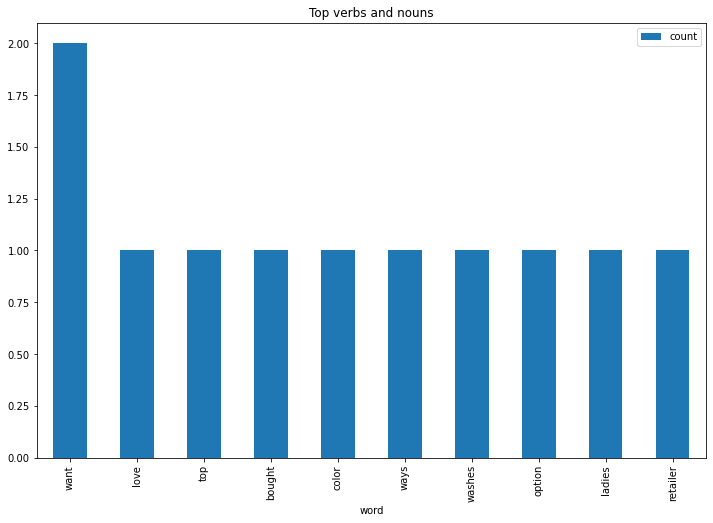

In [189]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')


In [190]:
import string
import spacy

In [191]:
from matplotlib.pyplot import imread

In [192]:
affin=pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/Latest-Data-Science-Assignments-Material/Day-34-Text-Mining-contd/Data-Sets/Afinn.csv",encoding="ISO-8859-1")
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [210]:
data

,ID,x,Rating
0,767,Absolutely wonderful - silky and sexy and comf...,4
1,1080,Love this dress! it's sooo pretty. i happene...,5
2,1077,I had such high hopes for this dress and reall...,3
3,1049,"I love, love, love this jumpsuit. it's fun, fl...",5
4,847,This shirt is very flattering to all due to th...,5
...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,5
23482,862,"It reminds me of maternity clothes. soft, stre...",3
23483,1104,"This fit well, but the top was very see throug...",3
23484,1084,I bought this dress for a wedding i have this ...,3


In [211]:
data = [x.strip() for x in data.x] 
data = [x for x in data if x]
data 

['Absolutely wonderful - silky and sexy and comfortable',
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
 "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments

In [212]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [214]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:10]

['Absolutely wonderful - silky and sexy and comfortable Love this dress!',
 "it's sooo pretty.",
 "i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.",
 'i bought a petite and am 5\'8".',
 'i love the length on me- hits just a little below the knee.',
 'would definitely be a true midi on someone who is truly petite.',
 'I had such high hopes for this dress and really wanted it to work for me.',
 'i initially ordered the petite small (my usual size) but i found this to be outrageously small.',
 'so small in fact that i could not zip it up!',
 'i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers.',
 'imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love, love, love this jumpsuit.',
 "it's fun, flirty, and fabulous!",
 'every time i wear it, i get n

In [215]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Absolutely wonderful - silky and sexy and comf...
1,it's sooo pretty.
2,"i happened to find it in a store, and i'm glad..."
3,"i bought a petite and am 5'8""."
4,i love the length on me- hits just a little be...
...,...
101883,"the medium fits my waist perfectly, but was wa..."
101884,"if i wanted to spend the money, i could get it..."
101885,side note - this dress was delivered to me wit...
101886,This dress in a lovely platinum is feminine an...


In [216]:
affinity_scores = affin.set_index('word')['value'].to_dict()


In [217]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [218]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [219]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [220]:
sent_df


,sentence,sentiment_value
0,Absolutely wonderful - silky and sexy and comf...,9
1,it's sooo pretty.,1
2,"i happened to find it in a store, and i'm glad...",3
3,"i bought a petite and am 5'8"".",0
4,i love the length on me- hits just a little be...,3
...,...,...
101883,"the medium fits my waist perfectly, but was wa...",5
101884,"if i wanted to spend the money, i could get it...",5
101885,side note - this dress was delivered to me wit...,0
101886,This dress in a lovely platinum is feminine an...,8


In [222]:
sent_df[sent_df.sentiment_value<-2]


,sentence,sentiment_value
26,it is a little baggy on me and hte xs is hte m...,-3
33,"also a bit loose for me, but no xxs... so i ke...",-4
64,the fabrics are terrible.,-3
160,i paired it with a collarless loose navy blaze...,-3
214,it's too bad the picture online has the model ...,-3
...,...,...
101453,my only regret is that i'm too darn short for ...,-3
101465,there are loose threads hanging out of the sea...,-3
101466,it is totally nuts that it costs $88.,-3
101857,its terrible!,-3


In [223]:
sent_df[sent_df.sentiment_value>10]

,sentence,sentiment_value
225,"Very comfortable, material is good, cut out on...",11
434,"with that aside, it seriously is a great quali...",11
574,"Nice vest, pretty olive color, hangs nice but....",11
584,"i think it is fun, something i will use for ye...",11
796,"colors are nice, there are subtle flowers with...",11
...,...,...
101103,Adorable skirt but fit is definitely too tight...,15
101121,i love the color and pattern on the top and re...,14
101177,"size runs large, have to get petite xxs, and i...",11
101239,"i love the feel, the fabric is airy, great I o...",12


In [224]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head(10)

,sentence,sentiment_value,word_count
0,Absolutely wonderful - silky and sexy and comf...,9,11
1,it's sooo pretty.,1,3
2,"i happened to find it in a store, and i'm glad...",3,24
3,"i bought a petite and am 5'8"".",0,7
4,i love the length on me- hits just a little be...,3,13
5,would definitely be a true midi on someone who...,0,12
6,I had such high hopes for this dress and reall...,3,16
7,i initially ordered the petite small (my usual...,0,17
8,so small in fact that i could not zip it up!,0,11
9,"i reordered it in petite medium, which was jus...",5,36


In [225]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
89914,"i like the flowiness of the top, makes it comf...",18,39
73529,Great jacket for night time in the south this ...,19,64
96217,Cute bright colored suit a little more orange ...,19,89
83910,the top portion is so great as it has nice sho...,19,54
27825,a few things to be aware of: \r\n- it is a lig...,20,96
41635,i highly recommend these pants for anybody who...,20,68
27637,"the dress in the store has cap sleeves, wh It ...",20,66
22079,"i orde This top is beautiful in person, love t...",21,42
29288,"love them, super sexy, slimming, and elegant, ...",25,41
26023,"This top is adorable ,i finally broke down and...",26,125


In [226]:
sent_df['sentiment_value'].describe()

count    101888.000000
mean          1.778414
std           2.380708
min         -12.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          26.000000
Name: sentiment_value, dtype: float64

In [227]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Absolutely wonderful - silky and sexy and comf...,9,11,0
1,it's sooo pretty.,1,3,1
2,"i happened to find it in a store, and i'm glad...",3,24,2
3,"i bought a petite and am 5'8"".",0,7,3
4,i love the length on me- hits just a little be...,3,13,4
...,...,...,...,...
101883,"the medium fits my waist perfectly, but was wa...",5,19,101883
101884,"if i wanted to spend the money, i could get it...",5,23,101884
101885,side note - this dress was delivered to me wit...,0,24,101885
101886,This dress in a lovely platinum is feminine an...,8,17,101886


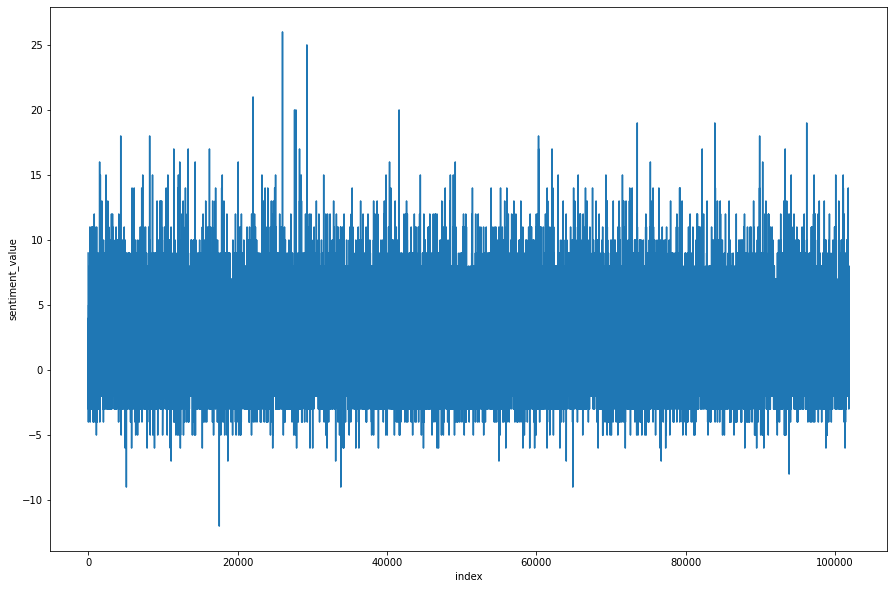

In [230]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

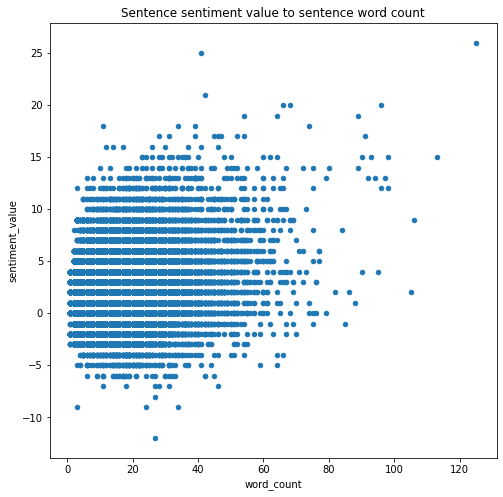

In [231]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')